In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
uv_bri_21 = "uv-brisbane-2021.csv"
uv_bri_20 = "uv-brisbane-2020.csv"
uv_bri_19 = "uv-brisbane-2019.csv"
uv_bri_18 = "uv-brisbane-2018.csv"
uv_bri_17 = "uv-brisbane-2017.csv"

uv_bri_21_df = pd.read_csv(uv_bri_21, encoding="UTF-8")
uv_bri_20_df = pd.read_csv(uv_bri_20, encoding="UTF-8")
uv_bri_19_df = pd.read_csv(uv_bri_19, encoding="UTF-8")
uv_bri_18_df = pd.read_csv(uv_bri_18, encoding="UTF-8")
uv_bri_17_df = pd.read_csv(uv_bri_17, encoding="UTF-8")

In [3]:
#Removing Lat and Lon for Brisbane cvs. Splitting date to time, year, month and day
uv_bri_17_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_bri_17_df[['Date','Time']] = uv_bri_17_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_bri_17_df[["year", "month", "day"]] = uv_bri_17_df["Date"].str.split("-", expand = True)
uv_bri_17_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_bri_17_df

,UV_Index,Time,year,month,day
0,0.01,00:01:00,2017,01,01
1,0.01,00:02:00,2017,01,01
2,0.01,00:03:00,2017,01,01
3,0.01,00:04:00,2017,01,01
4,0.01,00:05:00,2017,01,01
...,...,...,...,...,...
525006,0.01,23:55:00,2017,12,31
525007,0.01,23:56:00,2017,12,31
525008,0.01,23:57:00,2017,12,31
525009,0.01,23:58:00,2017,12,31


In [4]:
uv_bri_18_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_bri_18_df[['Date','Time']] = uv_bri_18_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_bri_18_df[["year", "month", "day"]] = uv_bri_18_df["Date"].str.split("-", expand = True)
uv_bri_18_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_bri_18_df

,UV_Index,Time,year,month,day
0,0.01,00:00:00,2018,01,01
1,0.01,00:01:00,2018,01,01
2,0.01,00:02:00,2018,01,01
3,0.01,00:03:00,2018,01,01
4,0.01,00:04:00,2018,01,01
...,...,...,...,...,...
520492,0.01,23:55:00,2018,12,31
520493,0.01,23:56:00,2018,12,31
520494,0.01,23:57:00,2018,12,31
520495,0.01,23:58:00,2018,12,31


In [5]:
uv_bri_19_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_bri_19_df[['Date','Time']] = uv_bri_19_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_bri_19_df[["year", "month", "day"]] = uv_bri_19_df["Date"].str.split("-", expand = True)
uv_bri_19_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_bri_19_df

,UV_Index,Time,year,month,day
0,0.01,00:00:00,2019,01,01
1,0.01,00:01:00,2019,01,01
2,0.01,00:02:00,2019,01,01
3,0.01,00:03:00,2019,01,01
4,0.01,00:04:00,2019,01,01
...,...,...,...,...,...
525581,0.01,23:55:00,2019,12,31
525582,0.01,23:56:00,2019,12,31
525583,0.01,23:57:00,2019,12,31
525584,0.01,23:58:00,2019,12,31


In [6]:
uv_bri_20_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_bri_20_df[['Date','Time']] = uv_bri_20_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_bri_20_df[["year", "month", "day"]] = uv_bri_20_df["Date"].str.split("-", expand = True)
uv_bri_20_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_bri_20_df

,UV_Index,Time,year,month,day
0,0.01,00:00:00,2020,01,01
1,0.01,00:01:00,2020,01,01
2,0.01,00:02:00,2020,01,01
3,0.01,00:03:00,2020,01,01
4,0.01,00:04:00,2020,01,01
...,...,...,...,...,...
526981,0.01,23:55:00,2020,12,31
526982,0.01,23:56:00,2020,12,31
526983,0.01,23:57:00,2020,12,31
526984,0.01,23:58:00,2020,12,31


In [7]:
uv_bri_21_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_bri_21_df[['Date','Time']] = uv_bri_21_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_bri_21_df[["year", "month", "day"]] = uv_bri_21_df["Date"].str.split("-", expand = True)
uv_bri_21_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_bri_21_df

,UV_Index,Time,year,month,day
0,0.01,00:00:00,2021,01,01
1,0.01,00:01:00,2021,01,01
2,0.01,00:02:00,2021,01,01
3,0.01,00:03:00,2021,01,01
4,0.01,00:04:00,2021,01,01
...,...,...,...,...,...
525364,0.01,23:55:00,2021,12,31
525365,0.01,23:56:00,2021,12,31
525366,0.01,23:57:00,2021,12,31
525367,0.01,23:58:00,2021,12,31


In [8]:
#Obtaining UV index average per month for 2017
#Data time taken between 6am to 6pm to remove outliers of nighttime data
uv_bri_17_df['hour'] = pd.to_datetime(uv_bri_17_df['Time'], format='%H:%M:%S').dt.hour
clean_bri17 = uv_bri_17_df[(uv_bri_17_df['hour'] >= 6) & (uv_bri_17_df['hour'] <=18)]

month_uv17 = clean_bri17.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv17 = pd.DataFrame(month_uv17)
monthmean_uv17

,month,UV_Index
0,01,4.718467
1,02,4.485515
2,03,2.922329
3,04,2.306711
4,05,1.607704
5,06,1.169890
6,07,1.479549
7,08,2.022213
8,09,2.950963
9,10,2.959834


In [9]:
#Obtaining UV index average per month for 2018
uv_bri_18_df['hour'] = pd.to_datetime(uv_bri_18_df['Time'], format='%H:%M:%S').dt.hour
clean_bri18 = uv_bri_18_df[(uv_bri_18_df['hour'] >= 6) & (uv_bri_18_df['hour'] <=18)]

month_uv18 = clean_bri18.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv18 = pd.DataFrame(month_uv18)
monthmean_uv18

,month,UV_Index
0,01,5.124171
1,02,3.919880
2,03,3.013520
3,04,2.247398
4,05,1.567490
5,06,1.151869
6,07,1.249632
7,08,1.795439
8,09,2.259864
9,10,2.599341


In [10]:
#Obtaining UV index average per month for 2019
uv_bri_19_df['hour'] = pd.to_datetime(uv_bri_19_df['Time'], format='%H:%M:%S').dt.hour
clean_bri19 = uv_bri_19_df[(uv_bri_19_df['hour'] >= 6) & (uv_bri_19_df['hour'] <=18)]

month_uv19 = clean_bri19.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv19 = pd.DataFrame(month_uv19)
monthmean_uv19

,month,UV_Index
0,01,4.827838
1,02,4.127401
2,03,3.095565
3,04,2.216875
4,05,1.571642
5,06,1.248092
6,07,1.484072
7,08,1.906336
8,09,2.835489
9,10,3.243538


In [11]:
#Obtaining UV index average per month for 2020
uv_bri_20_df['hour'] = pd.to_datetime(uv_bri_20_df['Time'], format='%H:%M:%S').dt.hour
clean_bri20 = uv_bri_20_df[(uv_bri_20_df['hour'] >= 6) & (uv_bri_20_df['hour'] <=18)]

month_uv20 = clean_bri20.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv20 = pd.DataFrame(month_uv20)
monthmean_uv20

,month,UV_Index
0,01,4.094878
1,02,3.419574
2,03,3.048600
3,04,2.384161
4,05,1.505460
5,06,1.234572
6,07,1.241851
7,08,1.887387
8,09,2.516524
9,10,3.112375


In [12]:
#Obtaining UV index average per month for 2021
uv_bri_21_df['hour'] = pd.to_datetime(uv_bri_21_df['Time'], format='%H:%M:%S').dt.hour
clean_bri21 = uv_bri_21_df[(uv_bri_21_df['hour'] >= 6) & (uv_bri_21_df['hour'] <=18)]

month_uv21 = clean_bri21.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv21 = pd.DataFrame(month_uv21)
monthmean_uv21

,month,UV_Index
0,01,4.621568
1,02,3.892450
2,03,2.724308
3,04,2.136880
4,05,1.526749
5,06,1.132836
6,07,1.177287
7,08,1.757327
8,09,2.509612
9,10,3.140262


In [13]:
#Merging monthyly UV averages for each year together
merge_df = pd.merge(monthmean_uv17, monthmean_uv18, on="month", how="outer")

merge_df = merge_df.rename(columns={"UV_Index_x":"UV_mean_2017",
                                    "UV_Index_y":"UV_mean_2018"})

merge_df

,month,UV_mean_2017,UV_mean_2018
0,01,4.718467,5.124171
1,02,4.485515,3.919880
2,03,2.922329,3.013520
3,04,2.306711,2.247398
4,05,1.607704,1.567490
5,06,1.169890,1.151869
6,07,1.479549,1.249632
7,08,2.022213,1.795439
8,09,2.950963,2.259864
9,10,2.959834,2.599341


In [14]:
merge_df1 = pd.merge(merge_df, monthmean_uv19, on="month", how="outer")

merge_df1 = merge_df1.rename(columns={"UV_Index":"UV_mean_2019"})

merge_df1

,month,UV_mean_2017,UV_mean_2018,UV_mean_2019
0,01,4.718467,5.124171,4.827838
1,02,4.485515,3.919880,4.127401
2,03,2.922329,3.013520,3.095565
3,04,2.306711,2.247398,2.216875
4,05,1.607704,1.567490,1.571642
5,06,1.169890,1.151869,1.248092
6,07,1.479549,1.249632,1.484072
7,08,2.022213,1.795439,1.906336
8,09,2.950963,2.259864,2.835489
9,10,2.959834,2.599341,3.243538


In [15]:
merge_df2 = pd.merge(merge_df1, monthmean_uv20, on="month", how="outer")

merge_df2 = merge_df2.rename(columns={"UV_Index":"UV_mean_2020"})

merge_df2

,month,UV_mean_2017,UV_mean_2018,UV_mean_2019,UV_mean_2020
0,01,4.718467,5.124171,4.827838,4.094878
1,02,4.485515,3.919880,4.127401,3.419574
2,03,2.922329,3.013520,3.095565,3.048600
3,04,2.306711,2.247398,2.216875,2.384161
4,05,1.607704,1.567490,1.571642,1.505460
5,06,1.169890,1.151869,1.248092,1.234572
6,07,1.479549,1.249632,1.484072,1.241851
7,08,2.022213,1.795439,1.906336,1.887387
8,09,2.950963,2.259864,2.835489,2.516524
9,10,2.959834,2.599341,3.243538,3.112375


In [16]:
merge_df3 = pd.merge(merge_df2, monthmean_uv21, on="month", how="outer")

merge_df3 = merge_df3.rename(columns={"UV_Index":"UV_mean_2021"})

merge_df3

,month,UV_mean_2017,UV_mean_2018,UV_mean_2019,UV_mean_2020,UV_mean_2021
0,01,4.718467,5.124171,4.827838,4.094878,4.621568
1,02,4.485515,3.919880,4.127401,3.419574,3.892450
2,03,2.922329,3.013520,3.095565,3.048600,2.724308
3,04,2.306711,2.247398,2.216875,2.384161,2.136880
4,05,1.607704,1.567490,1.571642,1.505460,1.526749
5,06,1.169890,1.151869,1.248092,1.234572,1.132836
6,07,1.479549,1.249632,1.484072,1.241851,1.177287
7,08,2.022213,1.795439,1.906336,1.887387,1.757327
8,09,2.950963,2.259864,2.835489,2.516524,2.509612
9,10,2.959834,2.599341,3.243538,3.112375,3.140262


In [17]:
#Obtain mean of each month over the 5 years and output in mean column
merge_df3['mean'] = merge_df3.mean(axis=1)
bris_df = merge_df3
bris_df.to_csv("../Output/bris_df.csv", index=False, header=True)
bris_df

C:\Users\chris\AppData\Local\Temp/ipykernel_102156/949661066.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df3['mean'] = merge_df3.mean(axis=1)


,month,UV_mean_2017,UV_mean_2018,UV_mean_2019,UV_mean_2020,UV_mean_2021,mean
0,01,4.718467,5.124171,4.827838,4.094878,4.621568,4.677384
1,02,4.485515,3.919880,4.127401,3.419574,3.892450,3.968964
2,03,2.922329,3.013520,3.095565,3.048600,2.724308,2.960864
3,04,2.306711,2.247398,2.216875,2.384161,2.136880,2.258405
4,05,1.607704,1.567490,1.571642,1.505460,1.526749,1.555809
5,06,1.169890,1.151869,1.248092,1.234572,1.132836,1.187452
6,07,1.479549,1.249632,1.484072,1.241851,1.177287,1.326478
7,08,2.022213,1.795439,1.906336,1.887387,1.757327,1.873740
8,09,2.950963,2.259864,2.835489,2.516524,2.509612,2.614490
9,10,2.959834,2.599341,3.243538,3.112375,3.140262,3.011070


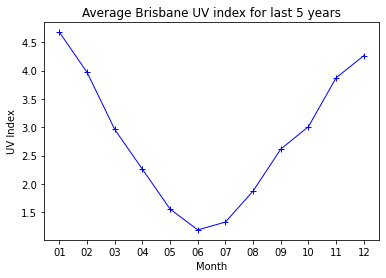

In [18]:
#Plot graph and save graph to file
plt.plot(merge_df3['month'], merge_df3['mean'], marker="+", color="blue", linewidth=1)
plt.xlabel("Month")
plt.ylabel("UV Index")
plt.title("Average Brisbane UV index for last 5 years")
plt.savefig("../Images/BrisbaneUV.png")

In [19]:
#Finding max UV index for each hour of day for years
hour_uv17 = uv_bri_17_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv18 = uv_bri_18_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv19 = uv_bri_19_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv20 = uv_bri_20_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv21 = uv_bri_21_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()

In [20]:
#Combining dataframes from each hour 
hour_merge = pd.merge(hour_uv17, hour_uv18, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index_x":"2017",
                                    "UV_Index_y":"2018"})

hour_merge

,hour,2017,2018
0,0,0.01,0.01
1,1,0.01,0.01
2,2,0.01,0.01
3,3,0.01,0.01
4,4,0.03,0.03
5,5,0.43,0.38
6,6,1.85,1.65
7,7,4.64,4.13
8,8,8.00,7.48
9,9,12.45,11.45


In [21]:
hour_merge = pd.merge(hour_merge, hour_uv19, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index":"2019"})

hour_merge

,hour,2017,2018,2019
0,0,0.01,0.01,0.01
1,1,0.01,0.01,0.01
2,2,0.01,0.01,0.01
3,3,0.01,0.01,0.01
4,4,0.03,0.03,0.03
5,5,0.43,0.38,0.38
6,6,1.85,1.65,1.62
7,7,4.64,4.13,4.03
8,8,8.00,7.48,7.21
9,9,12.45,11.45,11.17


In [22]:
hour_merge = pd.merge(hour_merge, hour_uv20, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index":"2020"})

hour_merge

,hour,2017,2018,2019,2020
0,0,0.01,0.01,0.01,0.01
1,1,0.01,0.01,0.01,0.01
2,2,0.01,0.01,0.01,0.01
3,3,0.01,0.01,0.01,0.01
4,4,0.03,0.03,0.03,0.03
5,5,0.43,0.38,0.38,0.40
6,6,1.85,1.65,1.62,1.79
7,7,4.64,4.13,4.03,4.48
8,8,8.00,7.48,7.21,8.54
9,9,12.45,11.45,11.17,11.50


In [23]:
hour_merge = pd.merge(hour_merge, hour_uv21, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index":"2021"})

hour_merge

,hour,2017,2018,2019,2020,2021
0,0,0.01,0.01,0.01,0.01,0.01
1,1,0.01,0.01,0.01,0.01,0.01
2,2,0.01,0.01,0.01,0.01,0.01
3,3,0.01,0.01,0.01,0.01,0.01
4,4,0.03,0.03,0.03,0.03,0.03
5,5,0.43,0.38,0.38,0.40,0.40
6,6,1.85,1.65,1.62,1.79,1.70
7,7,4.64,4.13,4.03,4.48,4.36
8,8,8.00,7.48,7.21,8.54,7.91
9,9,12.45,11.45,11.17,11.50,11.21


In [24]:
#Produce mean column for max UV index scores for each hour of day
hour_merge['hour'] = hour_merge['hour'].astype(str)
hour_merge['mean'] = hour_merge.mean(axis=1)
bris_hour = hour_merge
bris_hour.to_csv("../Output/bris_hour.csv", index=False, header=True)
bris_hour

C:\Users\chris\AppData\Local\Temp/ipykernel_102156/4058743352.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hour_merge['mean'] = hour_merge.mean(axis=1)


,hour,2017,2018,2019,2020,2021,mean
0,0,0.01,0.01,0.01,0.01,0.01,0.010
1,1,0.01,0.01,0.01,0.01,0.01,0.010
2,2,0.01,0.01,0.01,0.01,0.01,0.010
3,3,0.01,0.01,0.01,0.01,0.01,0.010
4,4,0.03,0.03,0.03,0.03,0.03,0.030
5,5,0.43,0.38,0.38,0.40,0.40,0.398
6,6,1.85,1.65,1.62,1.79,1.70,1.722
7,7,4.64,4.13,4.03,4.48,4.36,4.328
8,8,8.00,7.48,7.21,8.54,7.91,7.828
9,9,12.45,11.45,11.17,11.50,11.21,11.556


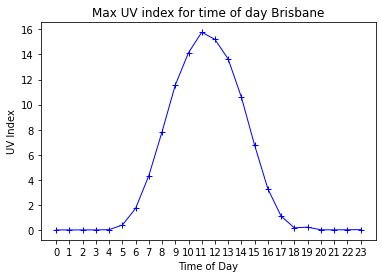

In [25]:
#Plotting graph and saving graph image to Image folder
plt.plot(bris_hour['hour'], bris_hour['mean'], marker="+", color="blue", linewidth=1)
plt.xlabel("Time of Day")
plt.ylabel("UV Index")
plt.title("Max UV index for time of day Brisbane")
plt.savefig("../Images/BrisHour.png")